In [1]:
import numpy as np
import random
from hw_model_package import*
import time
import math
from matplotlib import pyplot as plt
import matplotlib.lines as mlines
import pickle

- All files that are read in this notebook are stored in pickle format and therefore need to be loaded using pickle.load() function.
- tts_vs_nvar_real_wsat.csv stores the TTS vs N data for WSAT run using break-value error models obtained from Fig. S17 of supplementary file.
- tts_vs_nvar_ideal_wsat.csv stores the TTS vs N data for WSAT run using ideal conditions (no break-value errors).
- tts_vs_nvar_real_hohnn.csv stores the TTS vs N data for HO-HNN run using gain error models obtained from Fig. S17 of supplementary file.
- tts_vs_nvar_ideal_wsat.csv stores the TTS vs N data for HO-HNN run using ideal conditions (no gain errors).
- tts_vs_sigma_wsat.csv stores TTS vs the sigma/standard deviation of the memristor conductances, obtained by running WSAT on instances of N = 20 with break-value error models obtained in Fig. S18.
- tts_vs_sigma_hohnn.csv stores TTS vs the sigma/standard deviation of the memristor conductances, obtained by running HO-HNN on instances of N = 20 with gain error models obtained in Fig. S18.
- all_real_data_X_NY.csv where X can be replaced with 'wsat' or 'hohnn' depending on which algorithm's data it is. And Y can be replaced with any number from [14, 20, 50, 75, 100]. This file stores run-length (# of flips taken to converge) for each iteration (across 500 iterations) and for each instance (across 80 instances for N = 14, 20, 50, 100 and 50 instances for N = 75).

In [2]:
load_dir = './data/'
save_dir = './new_data/'
sat_dir = './sat/'

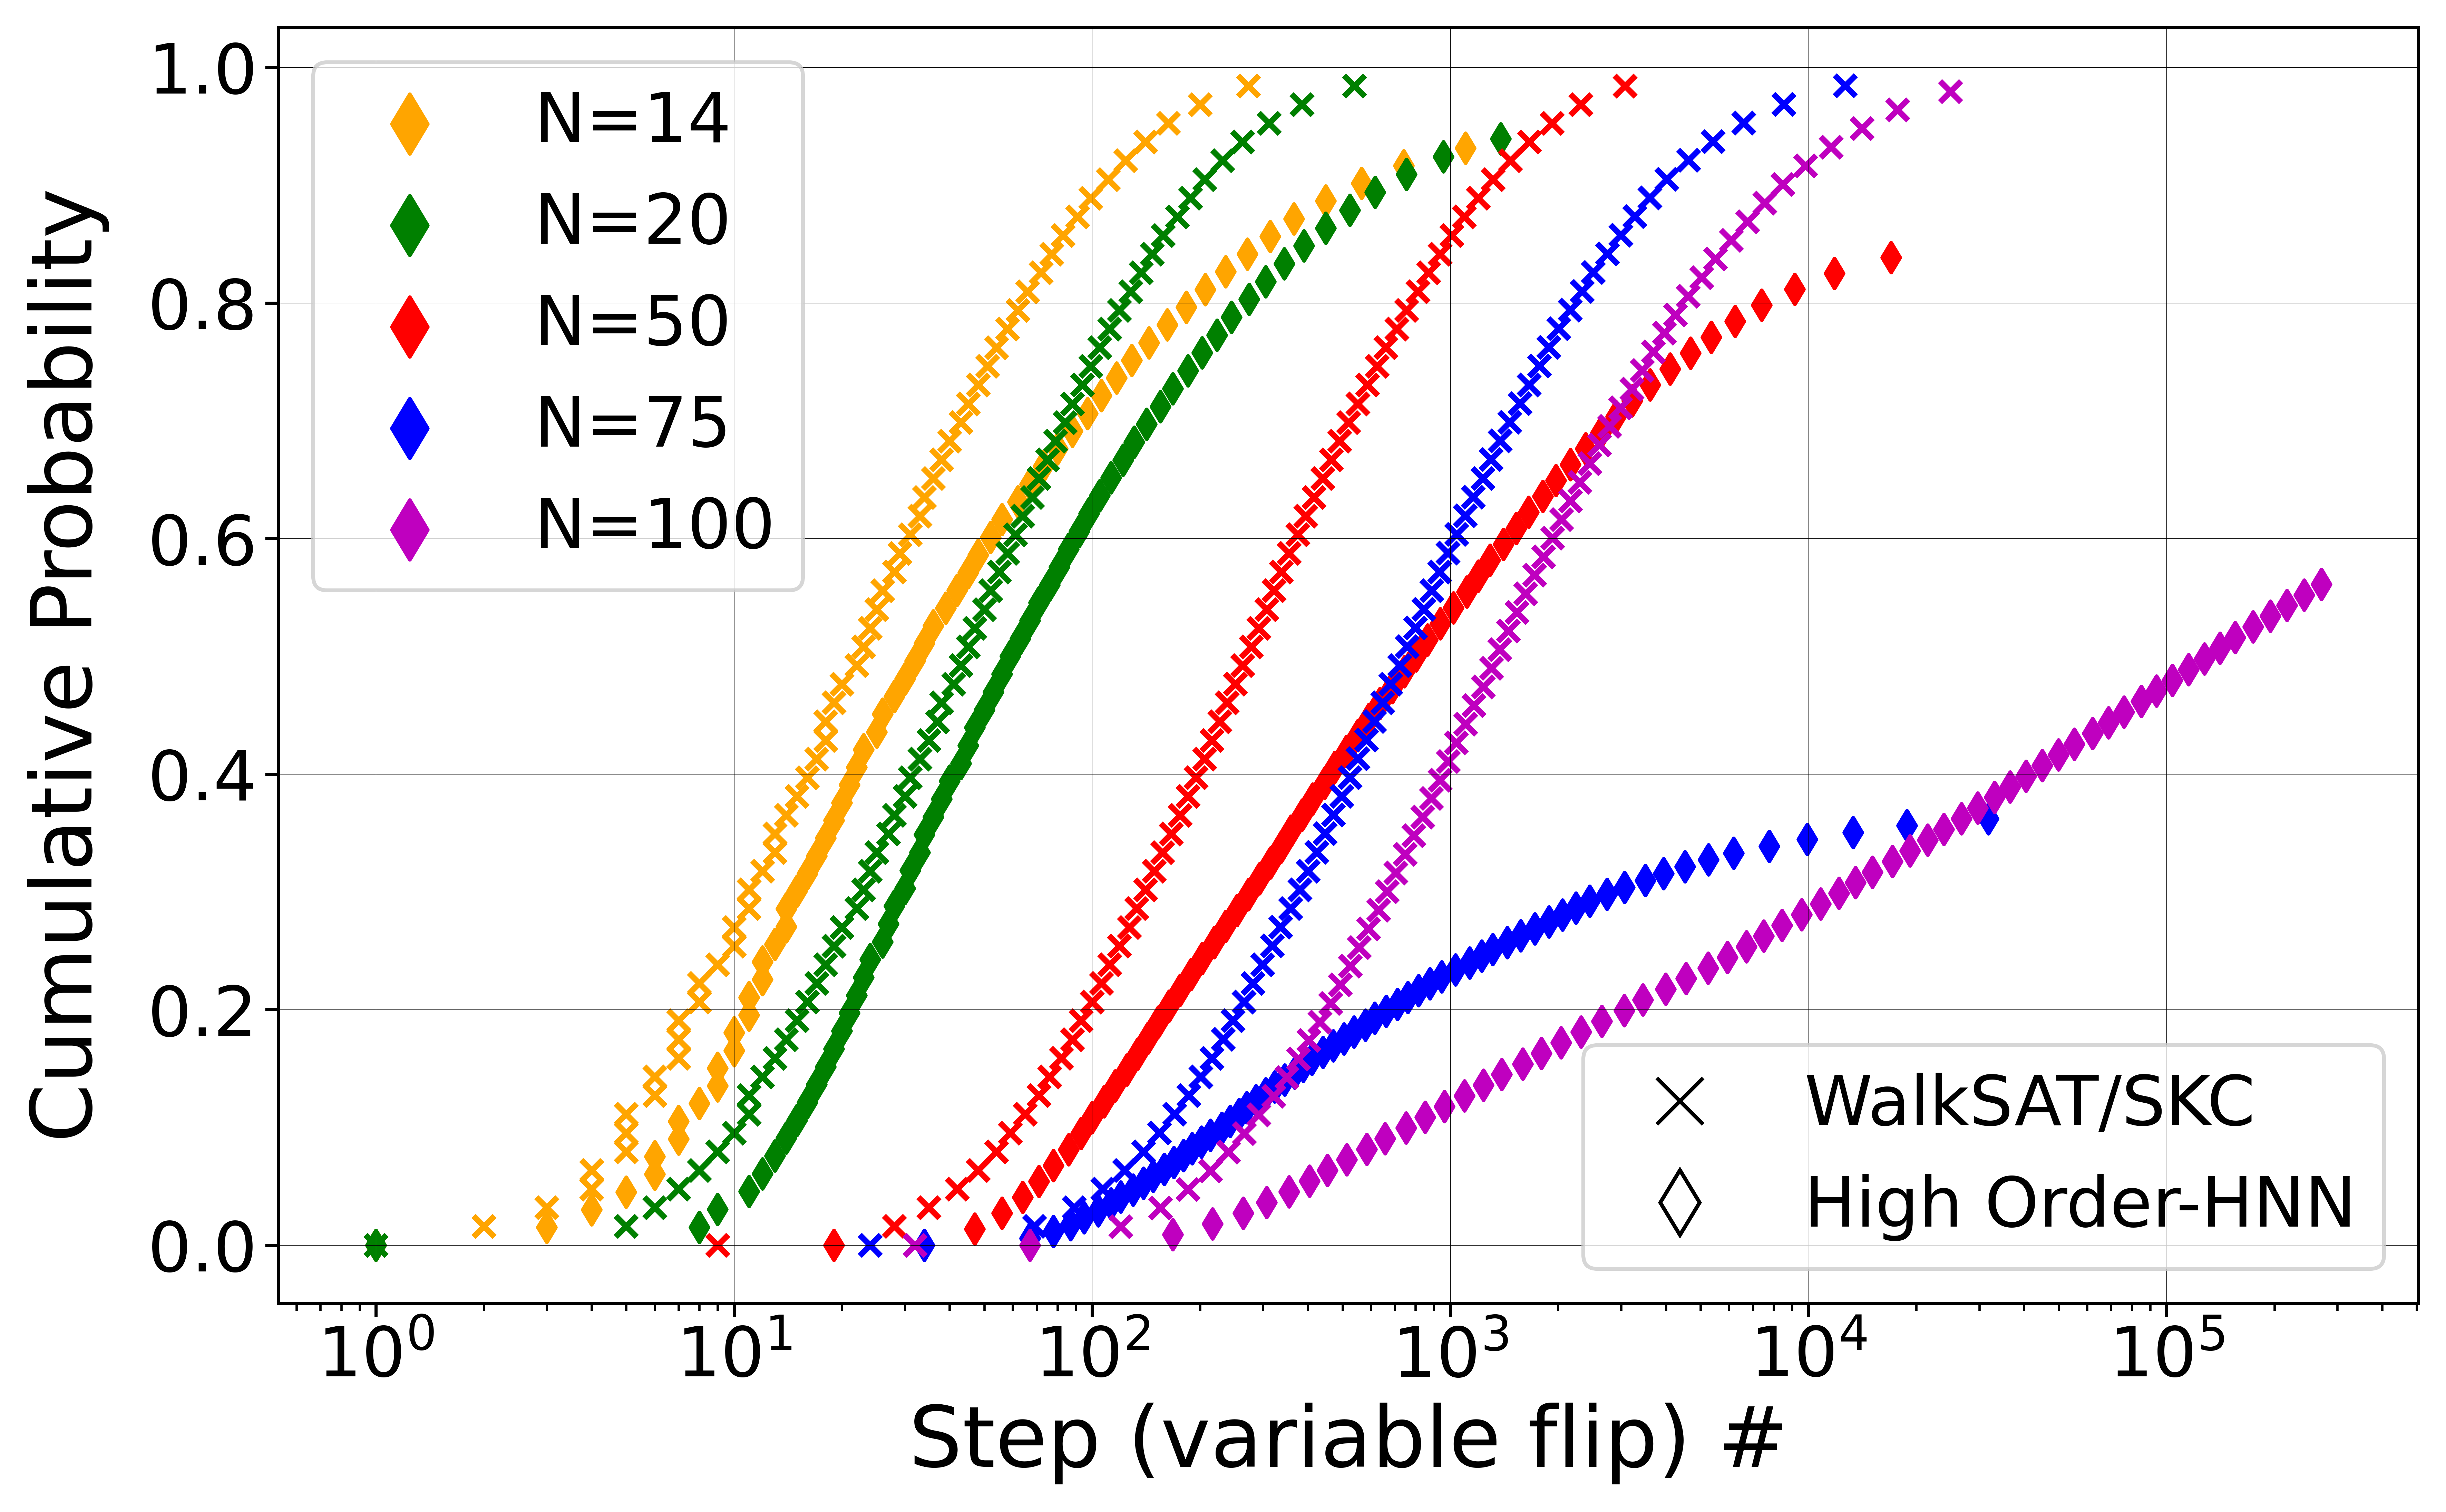

In [4]:
################################ Plotting of Figure 5a of main text ########################################

nvar_list = [14,20,50,75,100]
max_restarts = 500
max_flips = 50000
#plot_type = 1 means plot run-length of all iteratons/restarts across all instances of a problem size
#plot_type = 0 means plot mean run-length across successful iterations of each instance of a problem size
plot_type = 1

#To improve readability of plots, we refrain from plotting all datapoints. Instead we sample with regular intervals "num_datapoints"
#number of datapoints from the sorted run-length array.
num_datapoints = 63

fig = plt.figure(
    figsize=(10,6), dpi=800
)
ax = fig.add_subplot(111)
colors = ["orange", "g", "r", "b", "m"]

for i in range(len(nvar_list)):
    with open(load_dir+'all_real_data_wsat_N'+str(nvar_list[i])+'.csv','rb') as f:
        lst = pickle.load(f)
    full_data_arr = lst[1]
    if plot_type==0:
        temp_data = np.mean(full_data_arr,axis=1)
        temp_data = np.sort(temp_data)
        y_arr = np.arange(1,full_data_arr.shape[0]+1,1)/full_data_arr.shape[0]
        ax.plot(temp_data,y_arr,marker='.',markersize=0.5,label='N='+str(nvar_list[i]))
    else:
        temp_data = full_data_arr.flatten()
        temp_data = temp_data[temp_data!=max_flips]
        temp_data = np.sort(temp_data)
        y_arr = np.arange(1,len(temp_data)+1,1)/(max_restarts*full_data_arr.shape[0])
        step_size = math.ceil(len(temp_data)/num_datapoints)
        ax.scatter(temp_data[0::step_size],y_arr[0::step_size],marker='x',s=30,c=colors[i])
        
    with open(load_dir+'all_real_data_hohnn_N'+str(nvar_list[i])+'.csv','rb') as f:
        lst = pickle.load(f)
    full_data_arr = lst[0]
    if plot_type==0:
        temp_data = np.mean(full_data_arr,axis=1)
        temp_data = np.sort(temp_data)
        y_arr = np.arange(1,full_data_arr.shape[0]+1,1)/full_data_arr.shape[0]
        ax.plot(temp_data,y_arr,marker='.',markersize=0.5,label='N='+str(nvar_list[i]))
    else:
        temp_data = full_data_arr.flatten()
        temp_data = temp_data[temp_data!=-1]
        temp_data = np.sort(temp_data)
        y_arr = np.arange(1,len(temp_data)+1,1)/(max_restarts*full_data_arr.shape[0])
        step_size = math.ceil(len(temp_data)/num_datapoints)
        ax.scatter(temp_data[0::step_size],y_arr[0::step_size],marker='d',s=30,c=colors[i],label='N='+str(nvar_list[i]))
    
ax.tick_params('x', labelsize=18, pad=2)
ax.tick_params('y', labelsize=18, pad=2)
ax.set_xlabel('Step (variable flip) #', fontsize=22, labelpad=3)
ax.set_ylabel('Cumulative Probability', fontsize=22, labelpad=10)
leg1 = plt.legend(loc="upper left",fontsize=18,markerscale=2)
ax.add_artist(leg1)
handles = [mlines.Line2D([], [], marker=marker, mec='k', mfc='w', ls='') for marker in ['x', 'd']]
ax.legend(handles, ['WalkSAT/SKC', 'High Order-HNN'], loc='lower right',fontsize=18,markerscale=2)
plt.xscale("log")
plt.rc('grid', linestyle='-', color='black', linewidth=0.1)
plt.grid(True)
plt.show() 

WalkSAT/SKC Solver H/W TTS (s):  [9.96000000e-07 1.79922000e-06 1.03245354e-05 2.84120820e-05
 5.17888200e-05] ; for N:  [ 14.  20.  50.  75. 100.]
HO-HNN Solver H/W TTS (s):  [4.489820e-07 7.731720e-07 8.501060e-06 2.834140e-05 1.134444e-04] ; for N:  [ 14.  20.  50.  75. 100.]


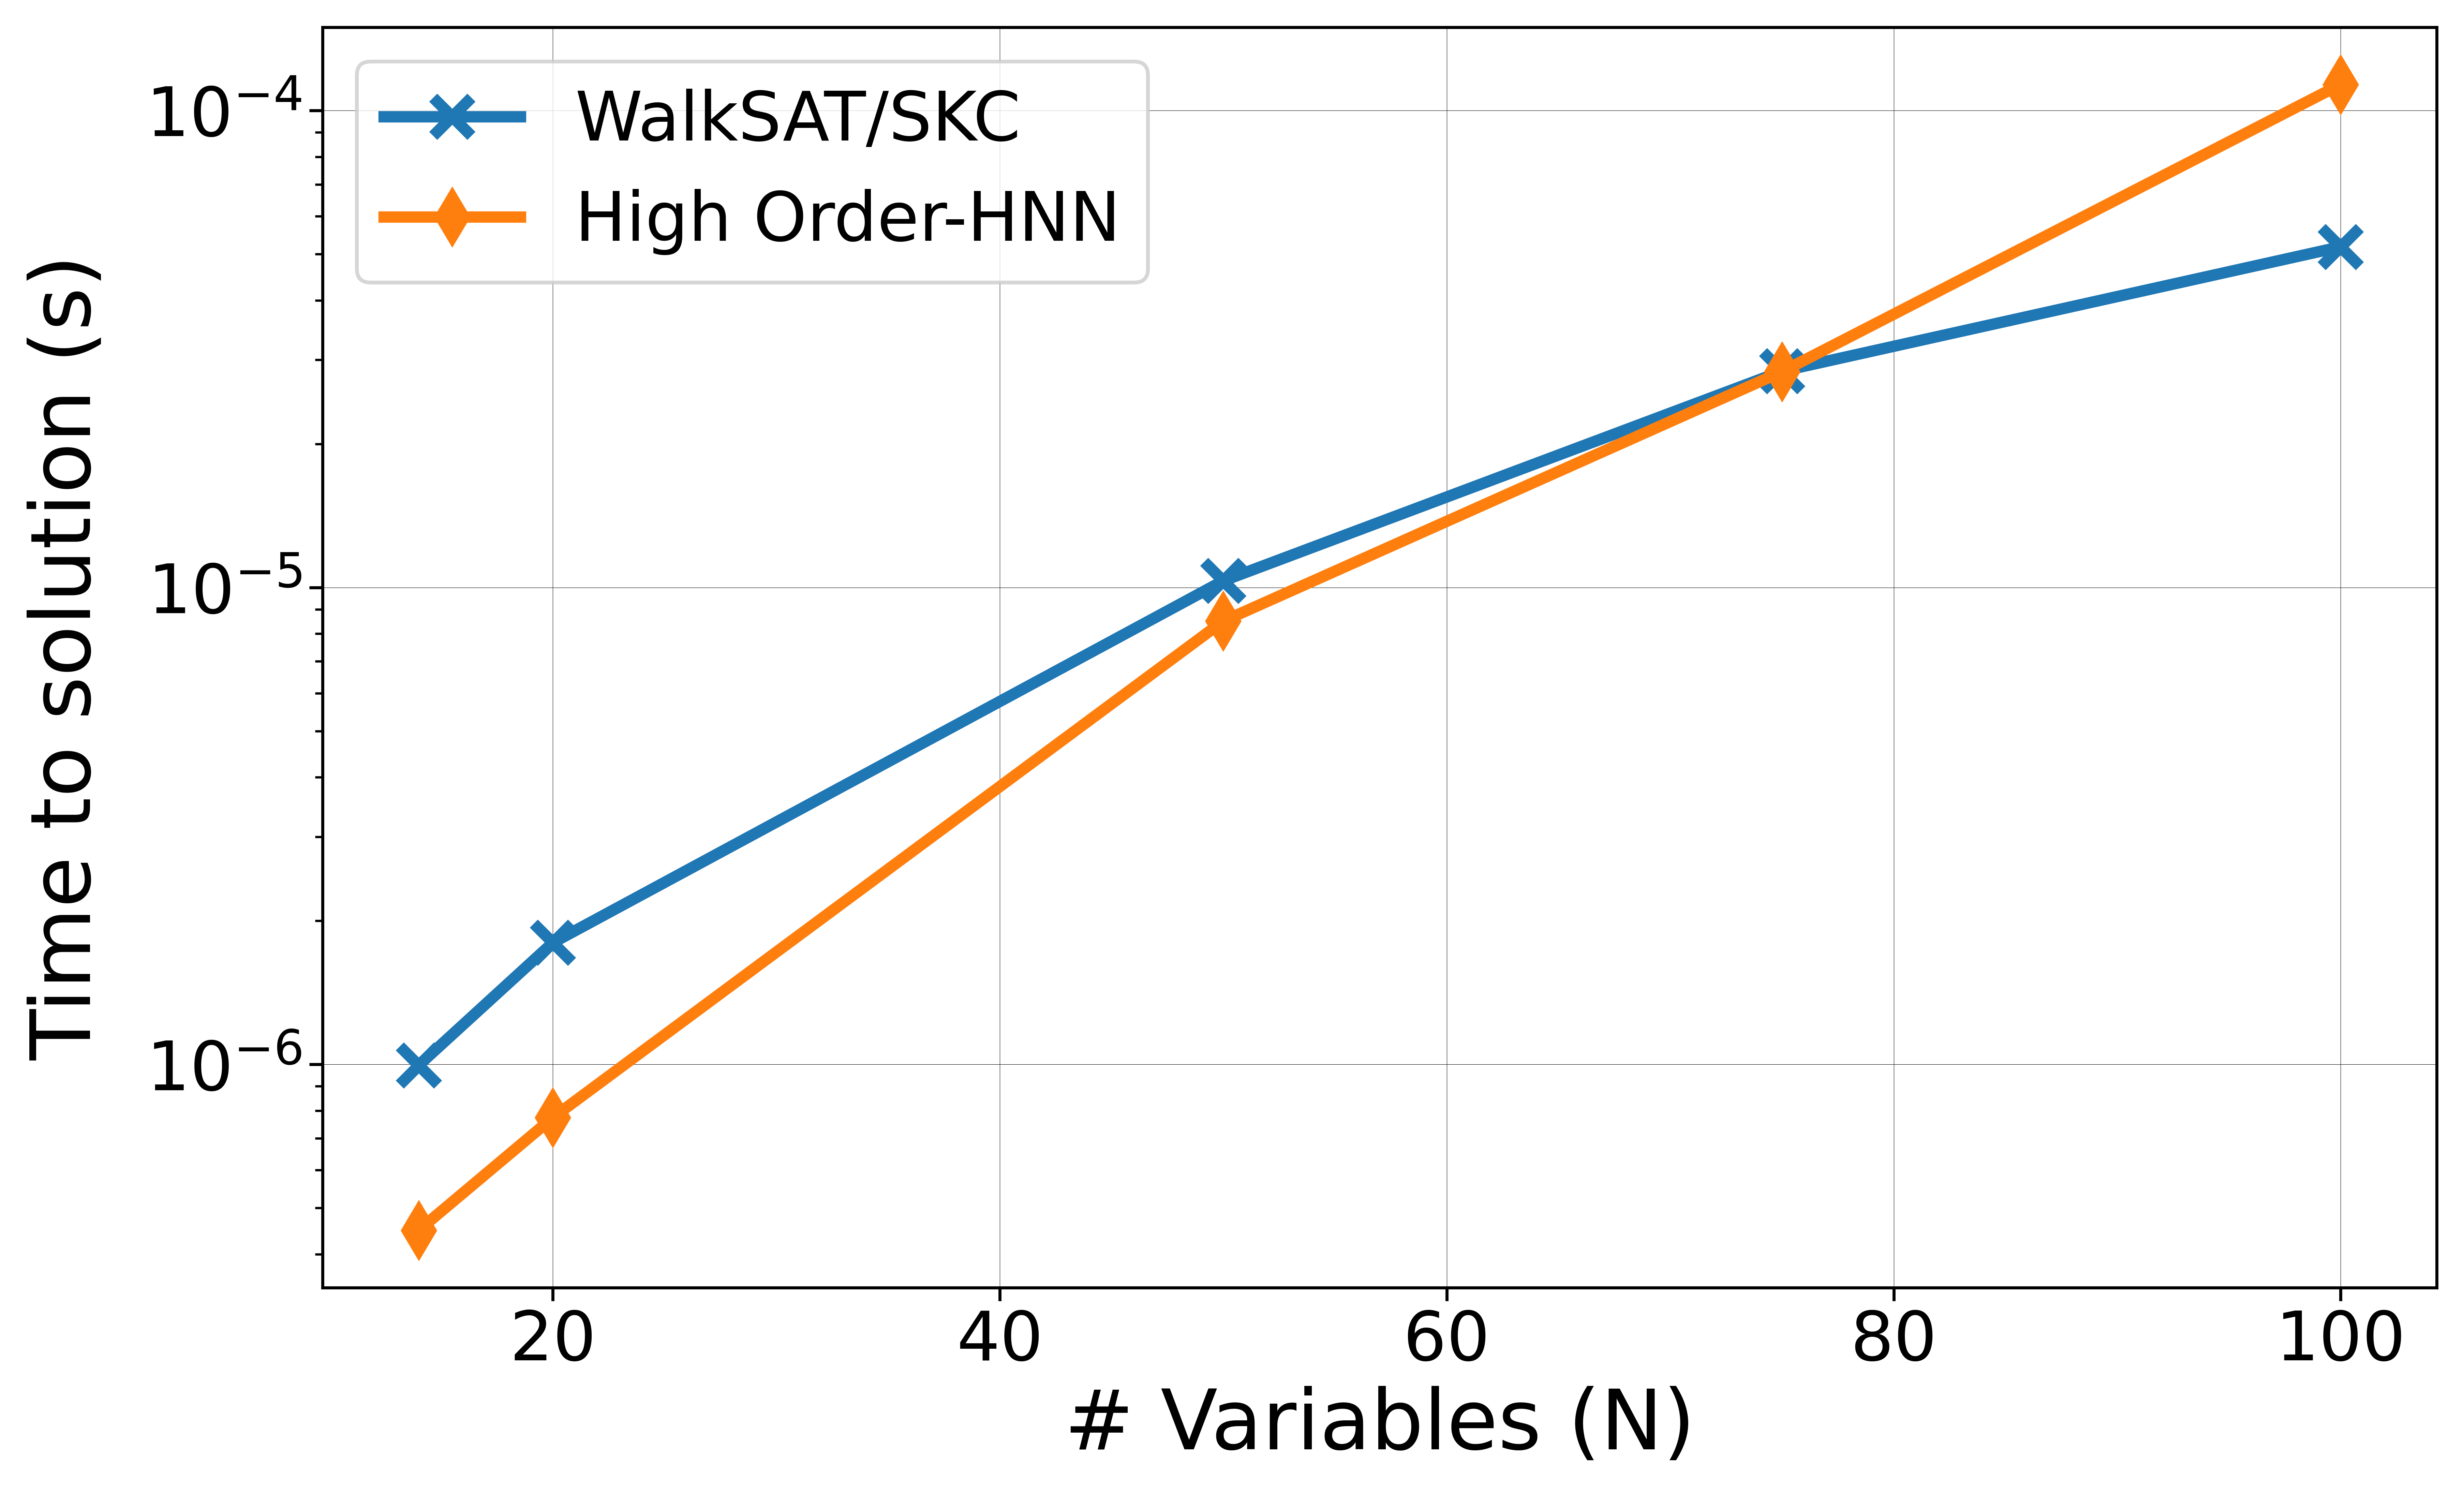

In [5]:
################################ Plotting of Figure 5b of main text ########################################

#Data for TTS vs N based on HW aware simulation of WSAT including non-zero memristor tuning error
with open(load_dir+'tts_vs_nvar_real_wsat.csv','rb') as f:
    lst = pickle.load(f)
tts_vs_nvar_real_wsat = lst[0]

#Data for TTS vs N based on HW aware simulation of HO-HNN including non-zero memristor tuning error
with open(load_dir+'tts_vs_nvar_real_hohnn.csv','rb') as f:
    lst = pickle.load(f)
tts_vs_nvar_real_hohnn = lst[0]

#Pipeline information detailed in Fig. S19 & S20
wsat_stages = 6
wsat_speedup_factor = 2
hohnn_stages = 2
hohnn_speedup_factor = 2
t_clk = 2e-9
hw_flag = 1

fig = plt.figure(
    figsize=(10,6), dpi=800
)
ax = fig.add_subplot(111)

if hw_flag==1:
    ax.plot(tts_vs_nvar_real_wsat[:,0],tts_vs_nvar_real_wsat[:,1]*t_clk*(wsat_stages/wsat_speedup_factor),marker='x',markersize=10,markeredgewidth=3,linewidth=3,label='WalkSAT/SKC')
    ax.plot(tts_vs_nvar_real_hohnn[:,0],tts_vs_nvar_real_hohnn[:,1]*t_clk*(hohnn_stages/hohnn_speedup_factor),marker='d',markersize=10,markeredgewidth=1,linewidth=3,label='High Order-HNN')
    print("WalkSAT/SKC Solver H/W TTS (s): ",tts_vs_nvar_real_wsat[:,1]*t_clk*(wsat_stages/wsat_speedup_factor),"; for N: ",tts_vs_nvar_real_wsat[:,0])
    print("HO-HNN Solver H/W TTS (s): ",tts_vs_nvar_real_hohnn[:,1]*t_clk*(hohnn_stages/hohnn_speedup_factor),"; for N: ",tts_vs_nvar_real_hohnn[:,0])
else:
    ax.plot(tts_vs_nvar_real_wsat[:,0],tts_vs_nvar_real_wsat[:,1],marker='x',markersize=10,linewidth=3,label='WalkSAT/SKC')
    ax.plot(tts_vs_nvar_real_hohnn[:,0],tts_vs_nvar_real_hohnn[:,1],marker='d',markersize=10,linewidth=3,label='High Order-HNN')

ax.tick_params('x', labelsize=18, pad=2)
ax.tick_params('y', labelsize=18, pad=2)
ax.set_xlabel('# Variables (N)', fontsize=22, labelpad=3)
ax.set_ylabel('Time to solution (s)', fontsize=22, labelpad=10)
plt.legend(loc="upper left",fontsize=18)
plt.yscale("log")
plt.rc('grid', linestyle='-', color='black', linewidth=0.1)
plt.grid(True)
plt.show() 

WalkSAT/SKC Solver H/W ETS (s):  [9.39227004e-09 2.40217281e-08 3.36195127e-07 1.40155333e-06
 3.44022860e-06] ; for N:  [ 14.  20.  50.  75. 100.]
HO-HNN Solver H/W ETS (s):  [1.33505696e-08 3.28061983e-08 8.85037536e-07 4.44448418e-06
 2.37922175e-05] ; for N:  [ 14.  20.  50.  75. 100.]


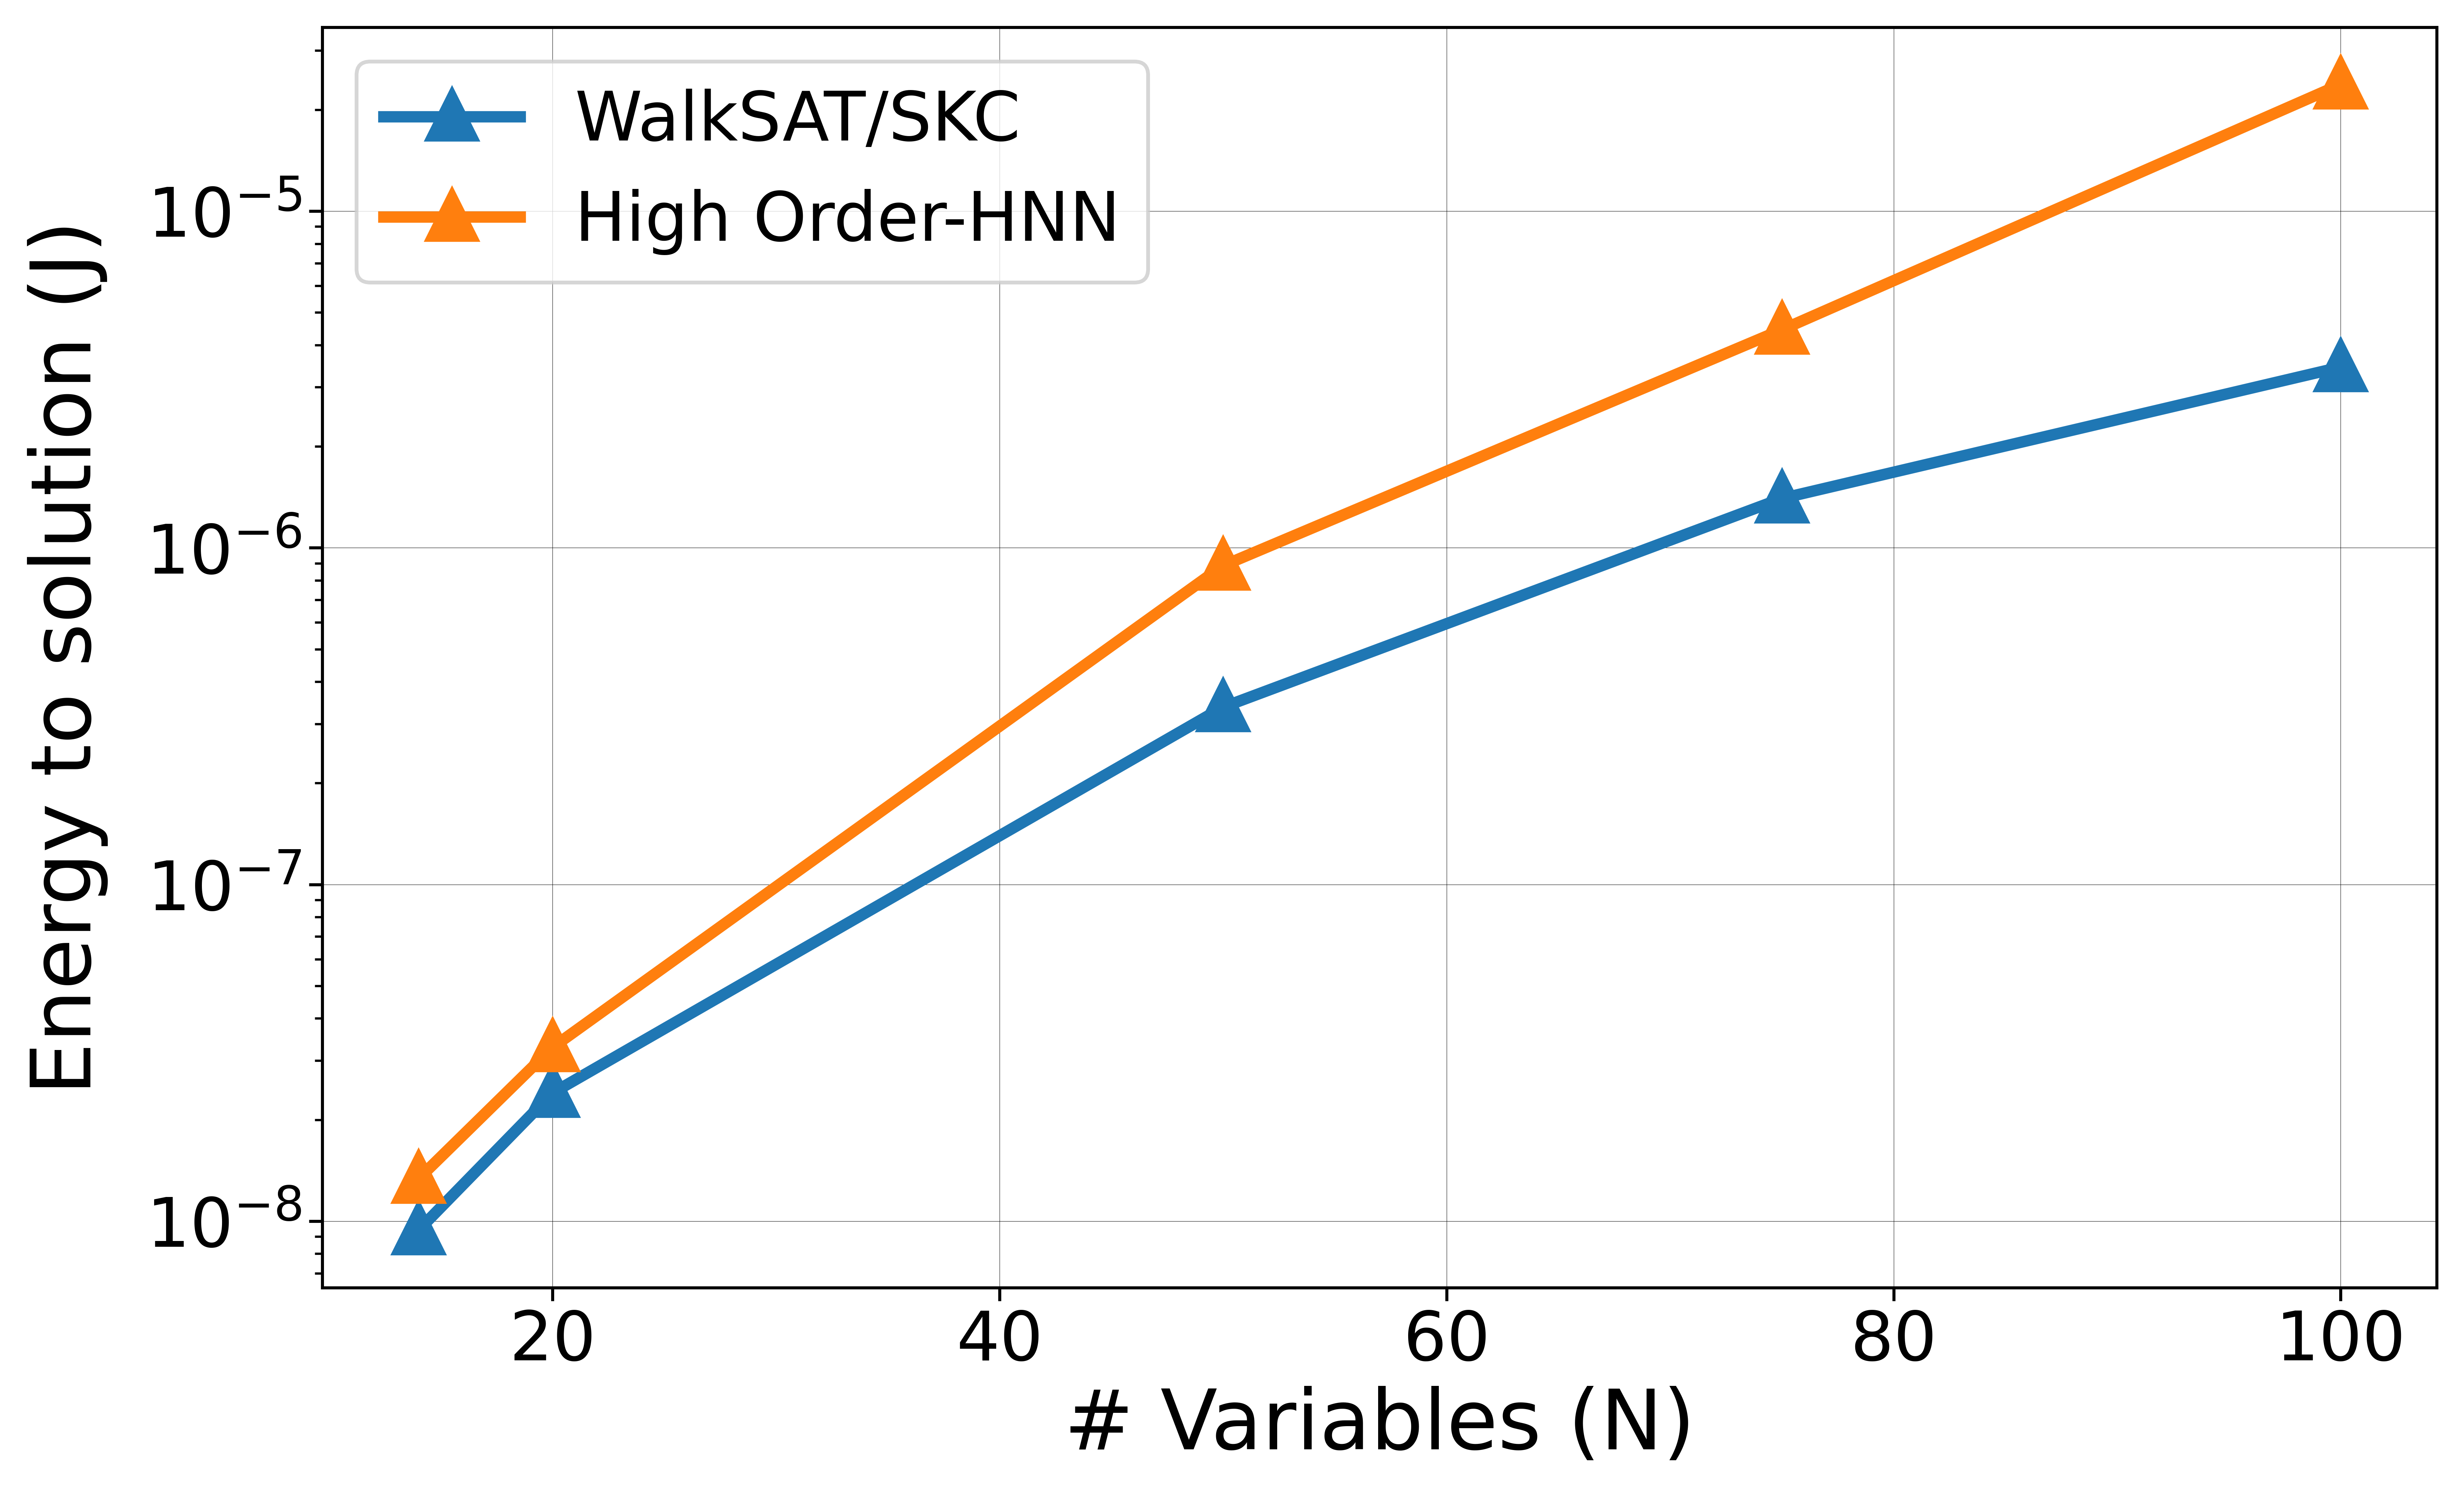

In [6]:
################################ Plotting of Figure 5c of main text ########################################

#Data for TTS vs N based on HW aware simulation of WSAT including non-zero memristor tuning error
with open(load_dir+'tts_vs_nvar_real_wsat.csv','rb') as f:
    lst = pickle.load(f)
tts_vs_nvar_real_wsat = lst[0]

#Data for TTS vs N based on HW aware simulation of HO-HNN including non-zero memristor tuning error
with open(load_dir+'tts_vs_nvar_real_hohnn.csv','rb') as f:
    lst = pickle.load(f)
tts_vs_nvar_real_hohnn = lst[0]

N_list = np.array([14,20,50,75,100])
M_list = np.array([64,91,218,325,430])

#Pipeline information detailed in Fig. S19 & S20
wsat_stages = 6
wsat_speedup_factor = 2
hohnn_stages = 2
hohnn_speedup_factor = 2
t_clk = 2e-9
hw_flag = 1

#Obtain average energy per clock cycle for values of N & M. Only the first argument is important for this figure
wsat_energy_per_clock,_,_ = getEPA_wsat(N_list,M_list,t_clk)
hohnn_energy_per_clock,_,_= getEPA_hohnn(N_list,M_list,t_clk)

fig = plt.figure(
    figsize=(10,6), dpi=800
)
ax = fig.add_subplot(111)
getEPA_wsat(20,91,2e-9)
if hw_flag==1:
    ax.plot(tts_vs_nvar_real_wsat[:,0],tts_vs_nvar_real_wsat[:,1]*wsat_energy_per_clock*(wsat_stages/wsat_speedup_factor),marker='^',markersize=10,markeredgewidth=3,linewidth=3,label='WalkSAT/SKC')
    ax.plot(tts_vs_nvar_real_hohnn[:,0],tts_vs_nvar_real_hohnn[:,1]*hohnn_energy_per_clock*(hohnn_stages/hohnn_speedup_factor),marker='^',markersize=10,markeredgewidth=3,linewidth=3,label='High Order-HNN')
    print("WalkSAT/SKC Solver H/W ETS (s): ",tts_vs_nvar_real_wsat[:,1]*wsat_energy_per_clock*(wsat_stages/wsat_speedup_factor),"; for N: ",tts_vs_nvar_real_wsat[:,0])
    print("HO-HNN Solver H/W ETS (s): ",tts_vs_nvar_real_hohnn[:,1]*hohnn_energy_per_clock*(hohnn_stages/hohnn_speedup_factor),"; for N: ",tts_vs_nvar_real_hohnn[:,0])
else:
    ax.plot(tts_vs_nvar_real_wsat[:,0],tts_vs_nvar_real_wsat[:,1],marker='^',markersize=10,linewidth=3,label='WalkSAT/SKC')
    ax.plot(tts_vs_nvar_real_hohnn[:,0],tts_vs_nvar_real_hohnn[:,1],marker='^',markersize=10,linewidth=3,label='High Order-HNN')
        
ax.tick_params('x', labelsize=18, pad=2)
ax.tick_params('y', labelsize=18, pad=2)
ax.set_xlabel('# Variables (N)', fontsize=22, labelpad=3)
ax.set_ylabel('Energy to solution (J)', fontsize=22, labelpad=10)
plt.legend(loc="upper left",fontsize=18)
plt.yscale("log")
plt.rc('grid', linestyle='-', color='black', linewidth=0.1)
plt.grid(True)
plt.show() 

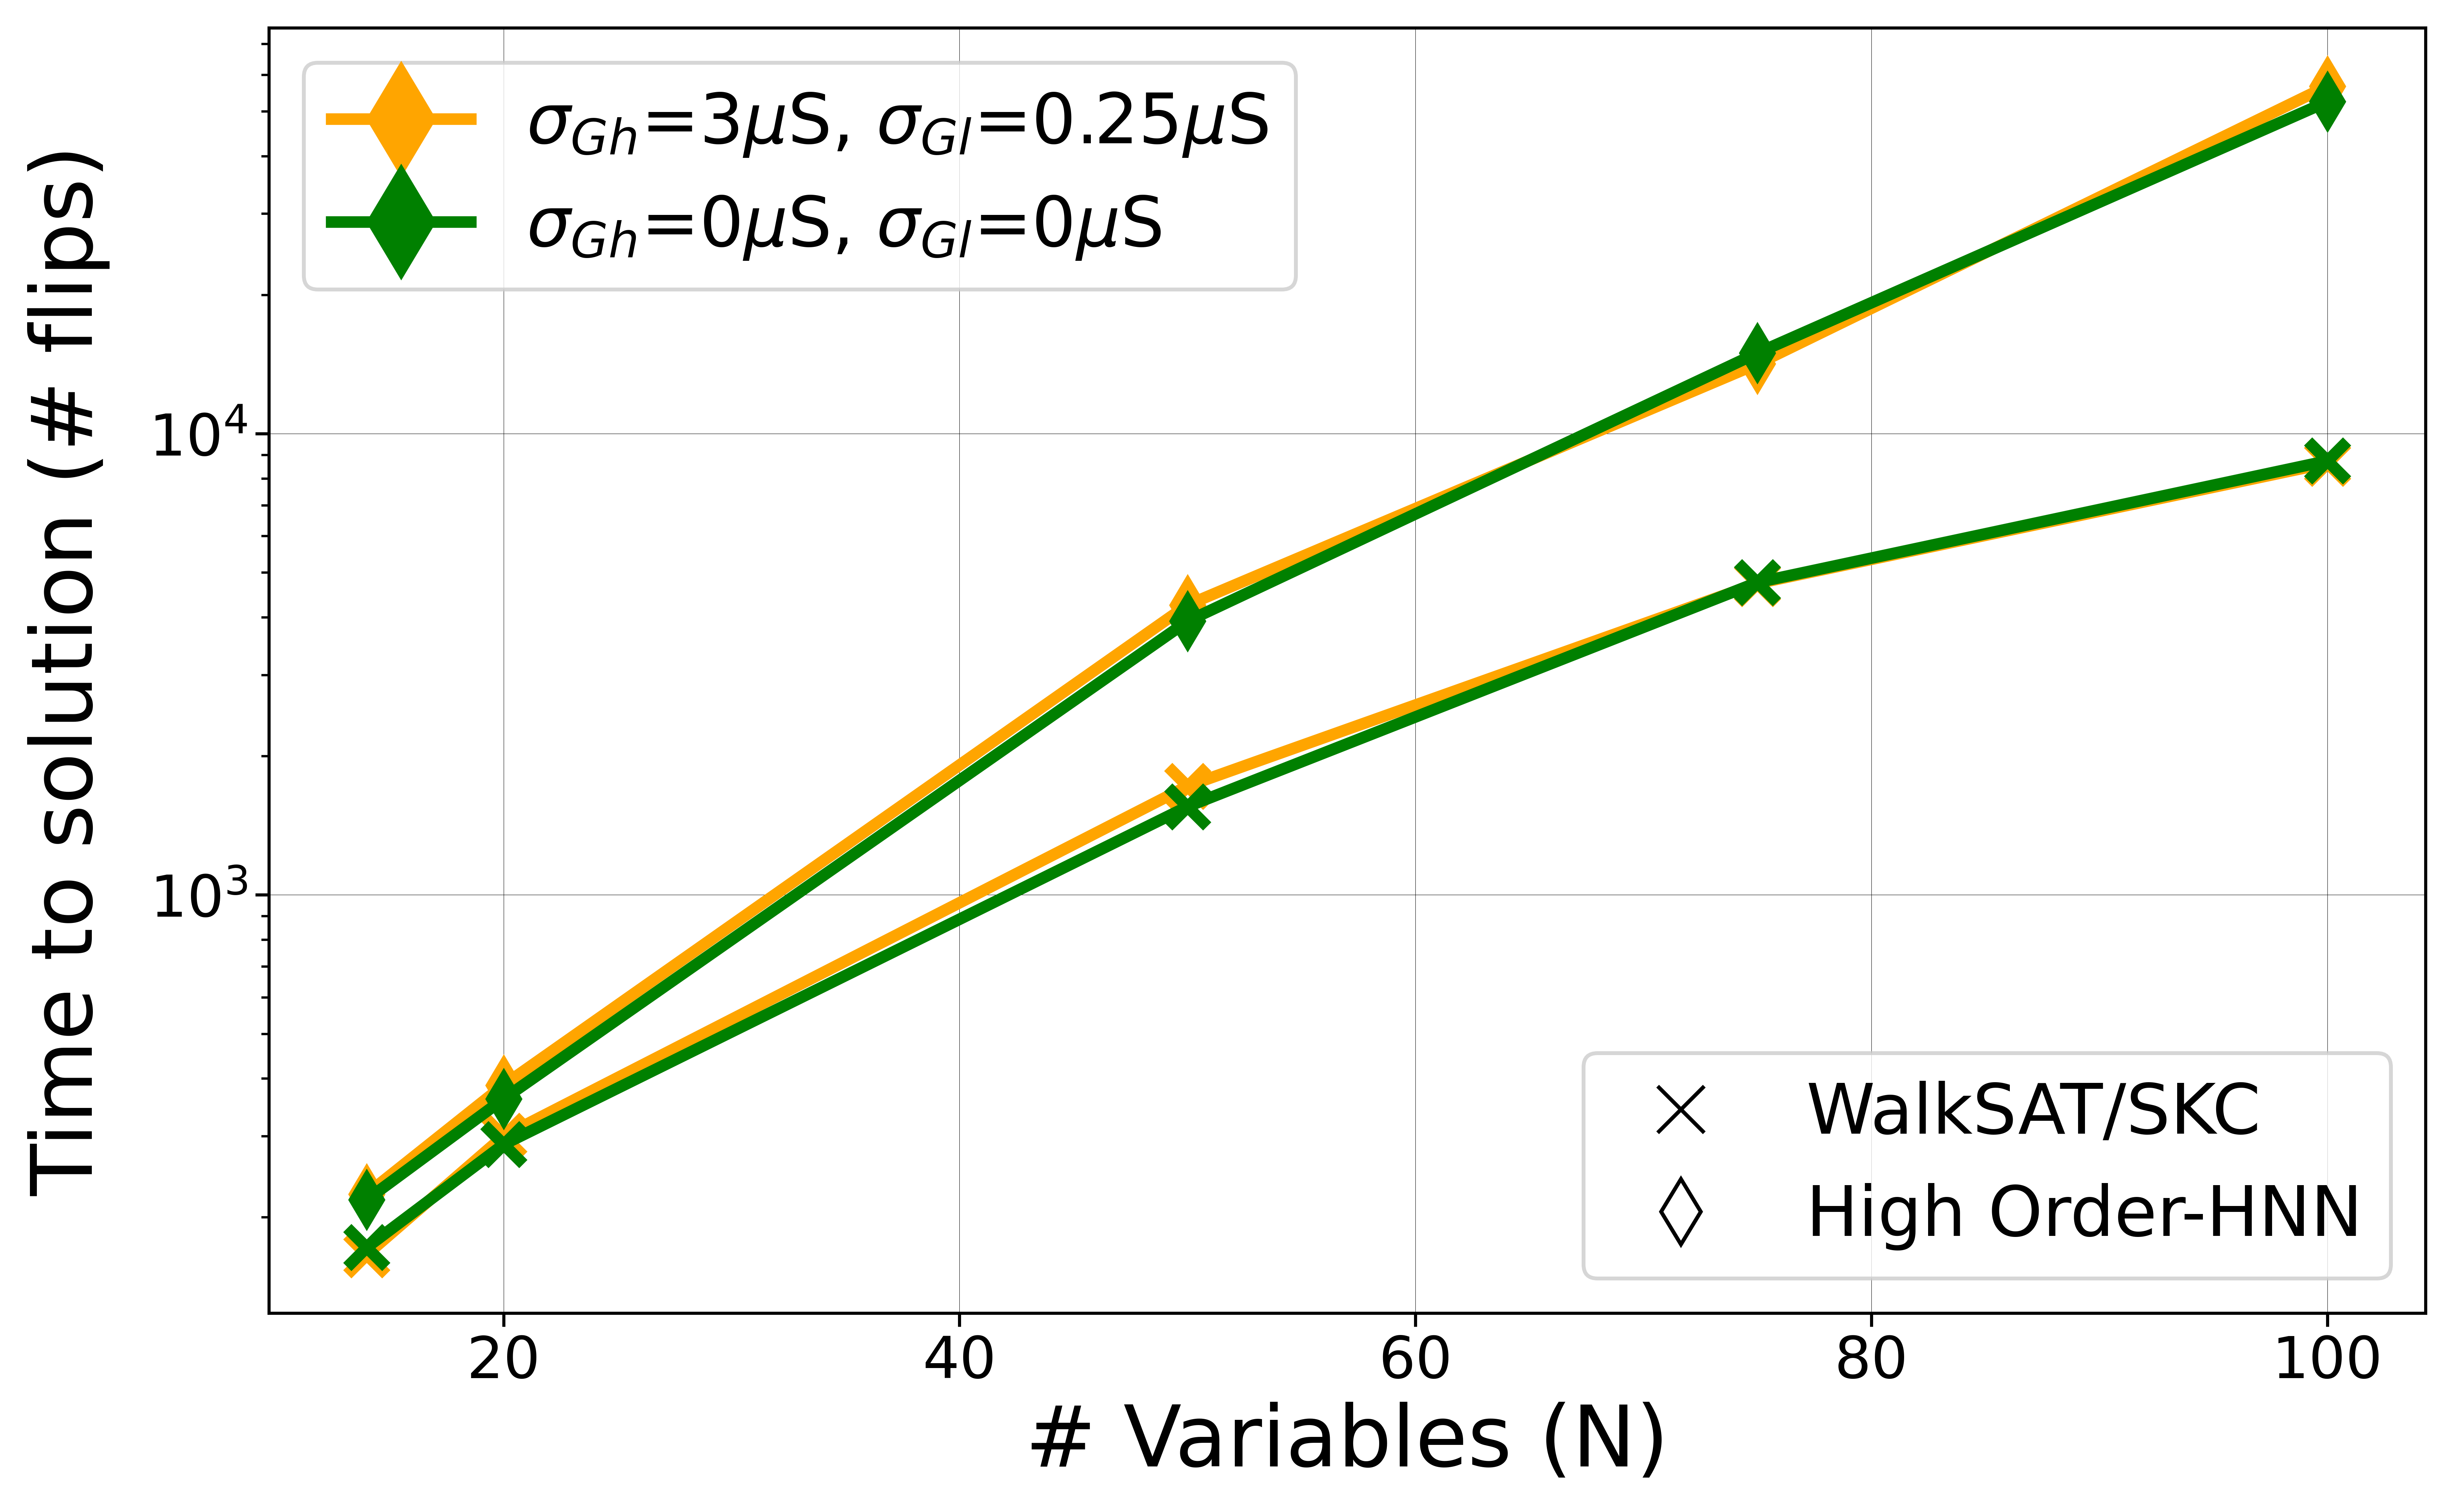

In [7]:
################################ Plotting of Supplementary Figure S21 a ########################################

#Data for TTS vs N based on HW aware simulation of WSAT including non-zero memristor tuning error
with open(load_dir+'tts_vs_nvar_real_wsat.csv','rb') as f:
    lst = pickle.load(f)
tts_vs_nvar_real_wsat = lst[0]

#Data for TTS vs N based on Ideal simulation of WSAT with zero memristor tuning error
with open(load_dir+'tts_vs_nvar_ideal_wsat.csv','rb') as f:
    lst = pickle.load(f)
tts_vs_nvar_ideal_wsat = lst[0]

#Data for TTS vs N based on HW aware simulation of HO-HNN including non-zero memristor tuning error
with open(load_dir+'tts_vs_nvar_real_hohnn.csv','rb') as f:
    lst = pickle.load(f)
tts_vs_nvar_real_hohnn = lst[0]

#Data for TTS vs N based on Ideal simulation of HO-HNN with zero memristor tuning error
with open(load_dir+'tts_vs_nvar_ideal_hohnn.csv','rb') as f:
    lst = pickle.load(f)
tts_vs_nvar_ideal_hohnn = lst[0]

colors = ["orange", "g", "r", "b", "m"]

fig = plt.figure(
    figsize=(10,6), dpi=800
)
ax = fig.add_subplot(111)

ax.plot(tts_vs_nvar_real_wsat[:,0],tts_vs_nvar_real_wsat[:,1],marker='x',markersize=10,markeredgewidth=3,linewidth=3,c='orange')
ax.plot(tts_vs_nvar_ideal_wsat[:,0],tts_vs_nvar_ideal_wsat[:,1],marker='x',markersize=10,markeredgewidth=3,linewidth=3,c='green')

ax.plot(tts_vs_nvar_real_hohnn[:,0],tts_vs_nvar_real_hohnn[:,1],marker='d',markersize=10,linewidth=3,c='orange',label='$\sigma_{Gh}$=3$\mu$S, $\sigma_{Gl}$=0.25$\mu$S')
ax.plot(tts_vs_nvar_ideal_hohnn[:,0],tts_vs_nvar_ideal_hohnn[:,1],marker='d',markersize=10,linewidth=3,c='green',label='$\sigma_{Gh}$=0$\mu$S, $\sigma_{Gl}$=0$\mu$S')

ax.tick_params('x', labelsize=15, pad=2)
ax.tick_params('y', labelsize=15, pad=2)
ax.set_xlabel('# Variables (N)', fontsize=22, labelpad=3)
ax.set_ylabel('Time to solution (# flips)', fontsize=22, labelpad=10)
leg1 = plt.legend(loc="upper left",fontsize=18,markerscale=2)
ax.add_artist(leg1)
handles = [mlines.Line2D([], [], marker=marker, mec='k', mfc='w', ls='') for marker in ['x', 'd']]
ax.legend(handles, ['WalkSAT/SKC', 'High Order-HNN'], loc='lower right',fontsize=18,markerscale=2)

plt.yscale("log")
plt.rc('grid', linestyle='-', color='black', linewidth=0.1)
plt.grid(True)
plt.show() 
    

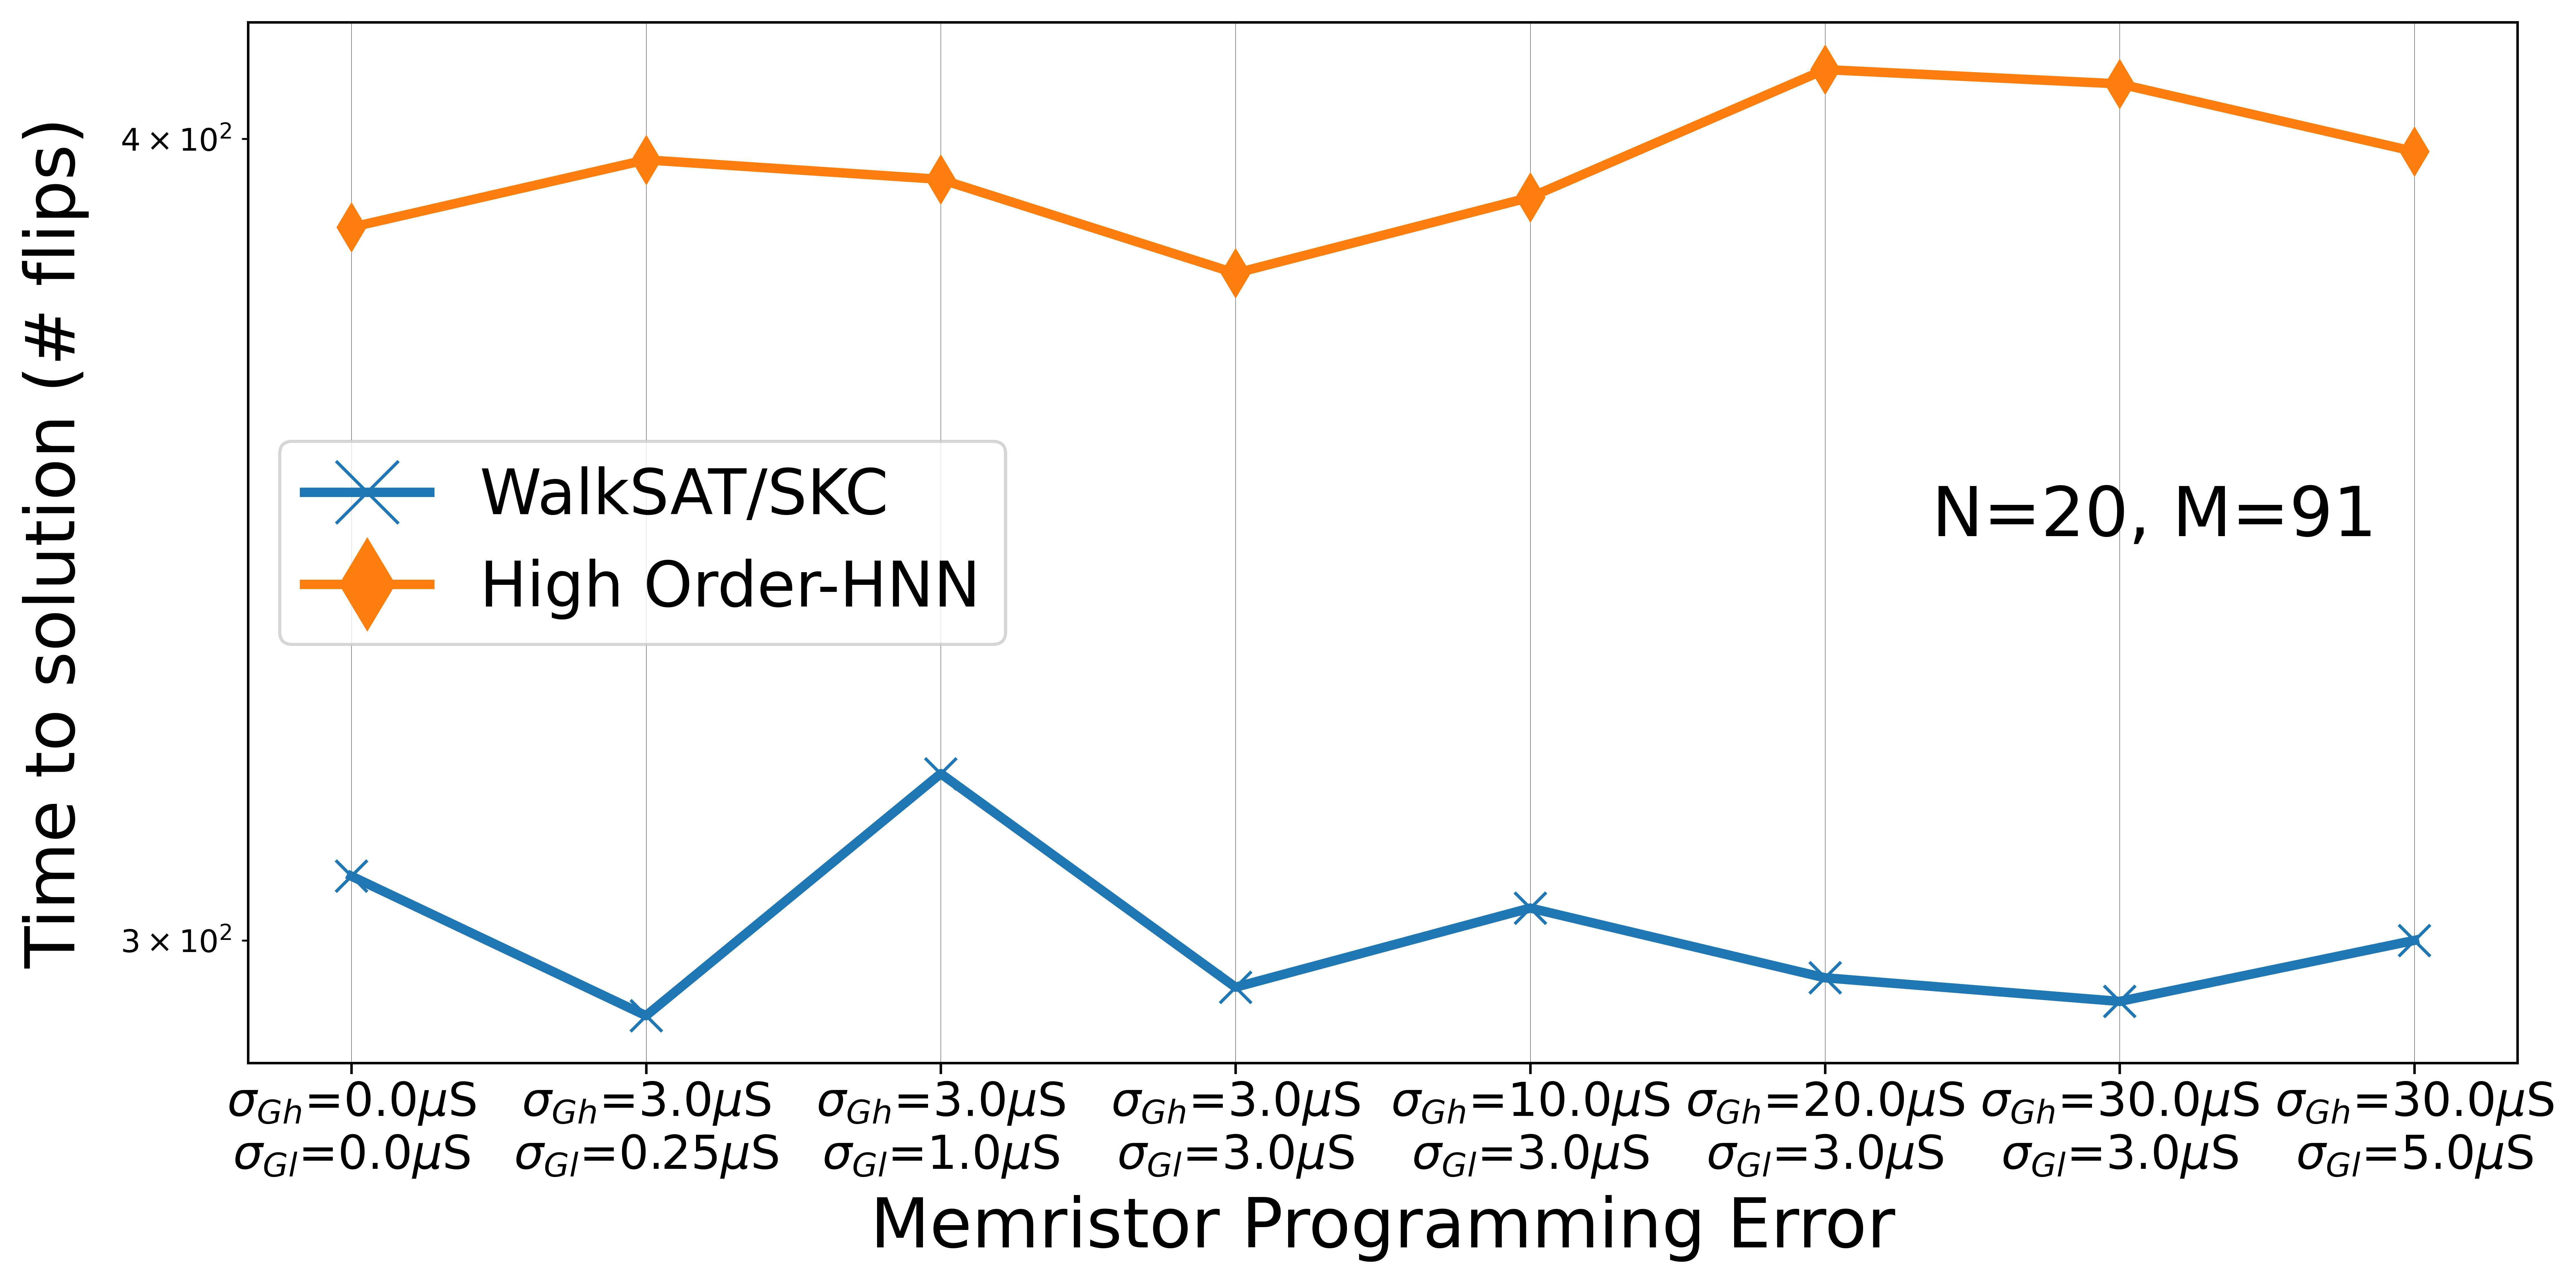

In [8]:
################################ Plotting of Supplementary Figure S21 b ########################################

#Range of standard deviations in memristor tuning considered
Gh_sigma_list = [0,3e-6,3e-6,3e-6,10e-6,20e-6,30e-6,30e-6]
Gl_sigma_list = [0,0.25e-6,1e-6,3e-6,3e-6,3e-6,3e-6,5e-6]

#Data for TTS vs standard deviation of memristor tuning on N = 20 problem instances for WSAT
with open(load_dir+'tts_vs_sigma_wsat.csv','rb') as f:
    lst = pickle.load(f)
tts_vs_sigma_wsat = lst[0][:,2]

#Data for TTS vs standard deviation of memristor tuning on N = 20 problem instances for HO-HNN
with open(load_dir+'tts_vs_sigma_hohnn.csv','rb') as f:
    lst = pickle.load(f)
tts_vs_sigma_hohnn = lst[0][:,2]

#Pipeline information detailed in Fig. S19 & S20
wsat_stages = 6
wsat_speedup_factor = 2
hohnn_stages = 2
hohnn_speedup_factor = 2
t_clk = 2e-9

fig = plt.figure(
    figsize=(13,6), dpi=800
)
ax = fig.add_subplot(111)
xticks = np.arange(0, 8, 1)
xlabels = ['$\sigma_{Gh}$='+str(Gh_sigma_list[x]*1e6)+'$\mu$S\n$\sigma_{Gl}$='+str(Gl_sigma_list[x]*1e6)+'$\mu$S' for x in xticks]

ax.plot(tts_vs_sigma_wsat,marker='x',markersize=10,linewidth=3,label='WalkSAT/SKC')
ax.plot(tts_vs_sigma_hohnn,marker='d',markersize=10,linewidth=3,label='High Order-HNN')

ax.tick_params('x', labelsize=15, pad=2)
ax.tick_params('y', labelsize=15, pad=2)
ax.set_xticks(xticks, labels=xlabels)
ax.set_xlabel('Memristor Programming Error', fontsize=22, labelpad=5)
ax.set_ylabel('Time to solution (# flips)', fontsize=22, labelpad=10)
plt.legend(loc="center left",fontsize=20,markerscale=2)
plt.yscale("log")
plt.rc('grid', linestyle='-', color='black', linewidth=0.1)
plt.grid(True)
plt.figtext(0.7, 0.5, 'N=20, M=91',fontsize=22)
plt.show() 

In [9]:
## Obtain total area or average power or energy per clock cycle information for the two solvers for different values of N, M ##
# Data for Table S5
N = 20
M = 91
t_clk = 2e-9
E,P,A = getEPA_wsat(N,M,t_clk)
print("WalkSAT/SKC solver, N=",N,", M=",M,", Energy per cycle=",E,", Power=",P," A=",A)
E,P,A= getEPA_hohnn(N,M,t_clk)
print("HO-HNN solver, N=",N,", M=",M,", Energy per cycle=",E,", Power=",P," A=",A)
E,P,A= getEPA_sohnn(N,M,t_clk)
print("SO-HNN solver, N=",N,", M=",M,", Energy per cycle=",E,", Power=",P," A=",A)

WalkSAT/SKC solver, N= 20 , M= 91 , Energy per cycle= 2.670238e-11 , Power= 0.013351189999999999  A= 4114.6335
HO-HNN solver, N= 20 , M= 91 , Energy per cycle= 8.486132e-11 , Power= 0.04243066  A= 3785.7285
SO-HNN solver, N= 20 , M= 91 , Energy per cycle= 1.2529452e-10 , Power= 0.06264726  A= 3538.9686
